In [1]:
# Load and Prepare Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = "C:/Users/atika/CS/Combined Data.csv"
data = pd.read_csv(file_path, encoding='latin1')
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [5]:
# Normalize text (lowercase)
data['statement'] = data['statement'].str.lower()

# Encode class labels
label_encoder = LabelEncoder()
data['status_encoded'] = label_encoder.fit_transform(data['status'])

C:\Users\atika\AppData\Local\Temp\ipykernel_15332\3546653426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['status'], order=data['status'].value_counts().index, palette='Set2')


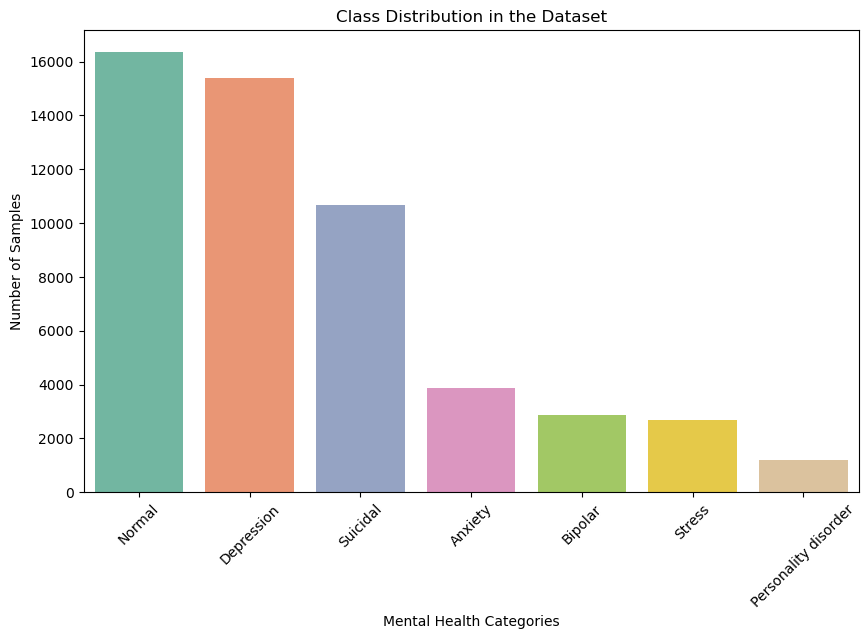

In [7]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data['status'], order=data['status'].value_counts().index, palette='Set2')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Mental Health Categories')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Balance dataset by downsampling
min_count = data['status'].value_counts().min()
balanced_data = data.groupby('status').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


C:\Users\atika\AppData\Local\Temp\ipykernel_15332\399484842.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('status').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


In [15]:
# Preprocessing
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['statement'] = data['statement'].apply(clean_text)
print("Text cleaning successful")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\atika\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Text cleaning successful


C:\Users\atika\AppData\Local\Temp\ipykernel_15332\2905506737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=balanced_data['status'], order=balanced_data['status'].value_counts().index, palette='Set2')


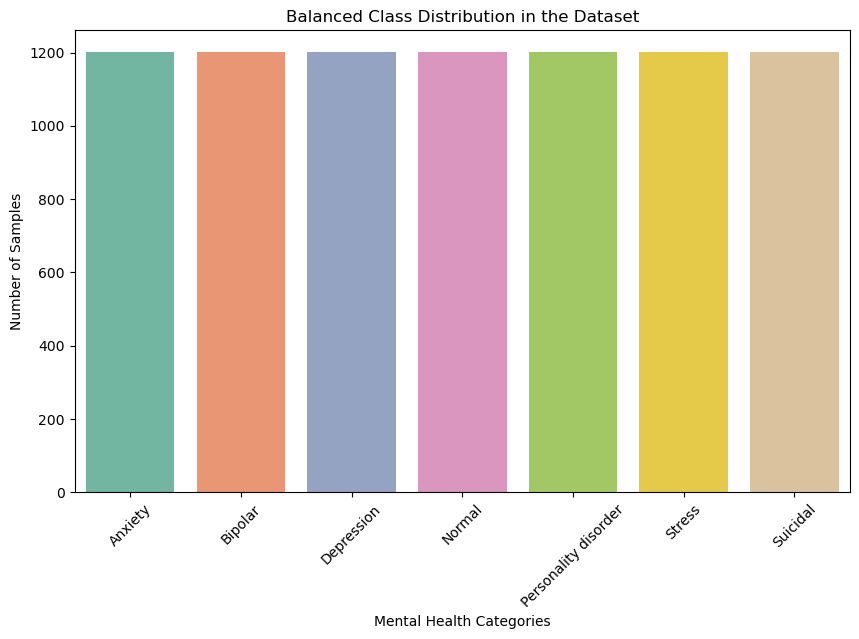

In [17]:
# Visualize balanced class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=balanced_data['status'], order=balanced_data['status'].value_counts().index, palette='Set2')
plt.title('Balanced Class Distribution in the Dataset')
plt.xlabel('Mental Health Categories')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Shuffle balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)



In [29]:
# Text Vectorization with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

X = balanced_data['statement'].fillna("")  # <-- FIX: Ensure no NaNs in text
y = balanced_data['status_encoded']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 23.1 MB/s eta 0:00:07
   -- ------------------------------------- 8.7/150.0 MB 26.8 MB/s eta 0:00:06
   --- ------------------------------------ 13.1/150.0 MB 23.5 MB/s eta 0:00:06
   ----- ---------------------------------- 18.9/150.0 MB 24.8 MB/s eta 0:00:06
   ------ --------------------------------- 23.6/150.0 MB 24.1 MB/s eta 0:00:06
   ------- -------------------------------- 26.7/150.0 MB 22.6 MB/s eta 0:00:06
   -------- ------------------------------- 30.4/150.0 MB 21.9 MB/s eta 0:00:06
   -------- ------------------------------- 32.8/150.0 MB 20.6 MB/s eta 0:00:06
   --------- ------------------------------ 35.4/150.0 MB 19.5 MB/s eta 0:00:06
   --------- ------------------------------ 37.0/150.0 MB 18.5 MB/s eta 0:00:07
   ---------- ----------------------------- 38.5/150.0 MB 17.5 MB/s eta 0:00:07
   ---------- ----------------------------- 40.1/15


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# Train XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

C:\Users\atika\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


                      precision    recall  f1-score   support

             Anxiety       0.80      0.85      0.82       240
             Bipolar       0.87      0.74      0.80       240
          Depression       0.58      0.50      0.54       240
              Normal       0.66      0.86      0.75       241
Personality disorder       0.81      0.66      0.73       240
              Stress       0.65      0.68      0.66       240
            Suicidal       0.66      0.71      0.68       241

            accuracy                           0.71      1682
           macro avg       0.72      0.71      0.71      1682
        weighted avg       0.72      0.71      0.71      1682



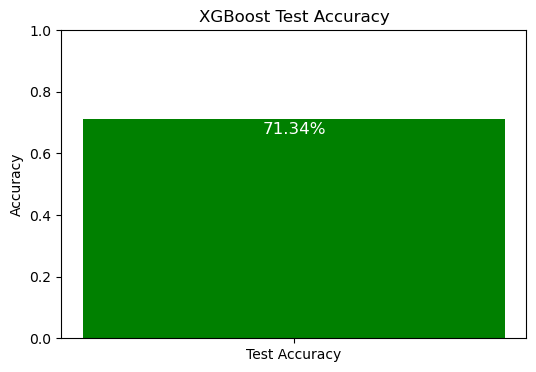

In [47]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Test Accuracy'], [test_accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('XGBoost Test Accuracy')
plt.text(0, test_accuracy - 0.05, f'{test_accuracy:.2%}', ha='center', color='white', fontsize=12)
plt.show()


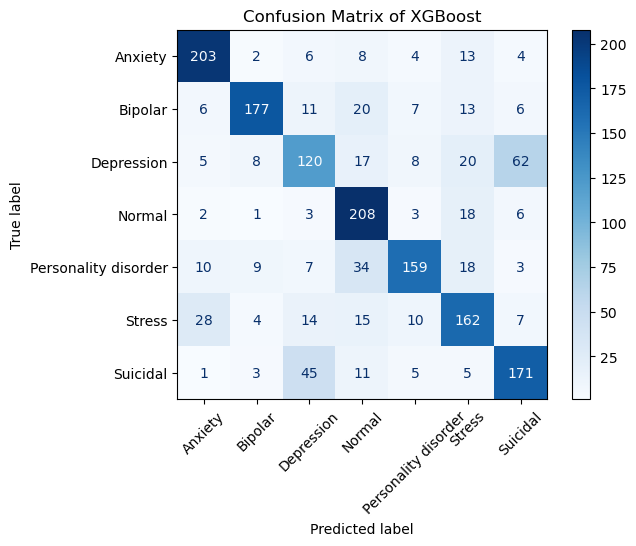

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix of XGBoost")
plt.show()


In [41]:
# Save model
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("XGBoost model and vectorizer saved successfully.")

XGBoost model and vectorizer saved successfully.
